In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [8]:
iris = pd.read_csv(r'C:\Users\lenovo\Downloads\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris[['Species']]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
y[0:5]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#splitting dataset into training set and testing set
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [33]:
#taining 
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
tree.fit(x_trainset,y_trainset)
print("Decision tree created")

Decision tree created


In [30]:
#testing
predTree = tree.predict(x_testset)

In [31]:
#calculating accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


In [32]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lenovo\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py37h03978a9_0         143 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    openssl-1.1.1f             |       hfa6e2cd_0         4.7 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        49.1 MB

The following NEW packag

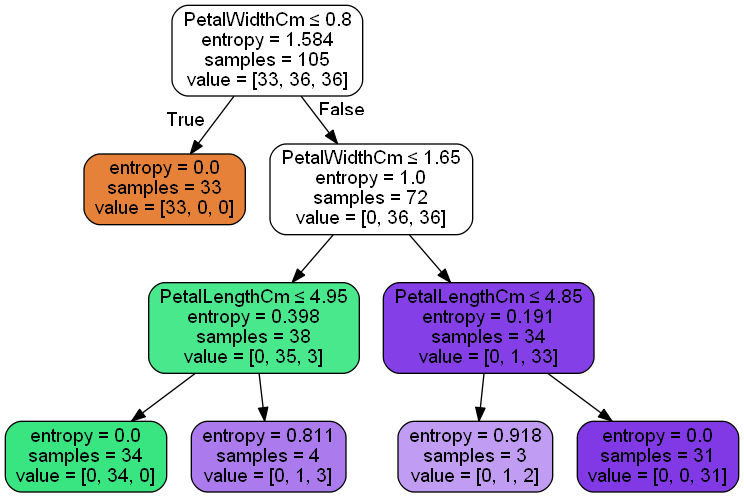

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
featureName=iris.columns[1:5]
export_graphviz(tree, out_file=dot_data, feature_names=featureName,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())